In [1]:
import cv2

In [2]:
from detectron2.utils.visualizer import Visualizer

In [3]:
from detectron2.data.datasets.coco import load_coco_json
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
json_file = 'datasets/t1/annotations/test.json'
image_root = 'datasets/t1/images/test/'
name = 'val_paper'

In [ ]:
targets = load_coco_json(json_file,image_root,name)

In [ ]:
DatasetCatalog.register(name, lambda: targets)
MetadataCatalog.get(name).set(json_file=json_file,
                                    image_root=image_root,
                                    evaluator_type="coco")

In [ ]:
meta2 = MetadataCatalog.get(name)

In [ ]:
len(meta2.thing_classes)

In [4]:
import os

In [5]:
def xywh_to_xminyminxmaxymax(x,y,w,h):
        xmin = x
        ymin = y
        xmax = x + w
        ymax = y + h
        return xmin, ymin, xmax, ymax

DATASET_ROOT = 'tao/'
ANN_ROOT=DATASET_ROOT
VAL_PATH = os.path.join(DATASET_ROOT, 'frames')#por qué con /train no me filtra?
VAL_JSON = os.path.join(ANN_ROOT, 'annotations-1.0/train.json')

targets_wof = load_coco_json(VAL_JSON, VAL_PATH)
targets = []
for annotation in targets_wof:
    file_name = annotation['file_name']
    if file_name.startswith('tao/frames/train/LaSOT'):
        targets.append(annotation)
for annotation in targets: #CAMBIO DE JPEG A JPG, JPEG NO EXISTE
    file_name = annotation['file_name']
    if file_name.endswith('.jpeg'):
        annotation['file_name'] = annotation['file_name'].replace('jpeg', 'jpg')

TAO_TO_COCO_MAPPING = {91: 13, 58: 34, 621: 33, 747: 49, 118: 8, 221: 51, 95: 1, 126: 73, 1122: 79, 729: 27, 926: 48, 1117: 61, 1038: 11, 1215: 40, 276: 74, 78: 21, 1162: 75, 699: 68, 185: 55, 13: 47, 79: 59, 982: 30, 371: 60, 896: 65, 99: 14, 642: 63, 1135: 6, 717: 64, 829: 53, 1115: 70, 235: 67, 805: 0, 41: 32, 452: 10, 1155: 25, 1144: 7, 625: 43, 60: 35, 502: 23, 4: 4, 779: 12, 1001: 57, 1099: 38, 34: 24, 45: 46, 139: 45, 980: 36, 133: 39, 382: 16, 480: 29, 154: 50, 429: 20, 211: 2, 392: 54, 36: 28, 347: 41, 544: 78, 1057: 37, 1132: 9, 1097: 62, 1018: 44, 579: 17, 714: 3, 1229: 22, 229: 15, 1091: 77, 35: 26, 979: 71, 299: 66, 174: 5, 475: 42, 237: 56, 428: 72, 937: 76, 961: 18, 852: 58, 993: 31, 81: 19}
COCO_TO_OWOD_MAPPING = {0: 14, 1: 1, 2: 6, 3: 13, 4: 0, 5: 5, 6: 18, 7: 20, 8: 3, 9: 21, 10: 22, 11: 23, 12: 24, 13: 25, 14: 2, 15: 7, 16: 11, 17: 12, 18: 16, 19: 9, 20: 26, 21: 27, 22: 28, 23: 29, 24: 30, 25: 31, 26: 32, 27: 33, 28: 34, 29: 40, 30: 41, 31: 42, 32: 43, 33: 44, 34: 45, 35: 46, 36: 47, 37: 48, 38: 49, 39: 4, 40: 74, 41: 75, 42: 76, 43: 77, 44: 78, 45: 79, 46: 50, 47: 51, 48: 52, 49: 53, 50: 54, 51: 55, 52: 56, 53: 57, 54: 58, 55: 59, 56: 8, 57: 17, 58: 15, 59: 60, 60: 10, 61: 61, 62: 19, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 35, 69: 36, 70: 37, 71: 38, 72: 39, 73: 67, 74: 68, 75: 69, 76: 70, 77: 71, 78: 72, 79: 73}

for key in COCO_TO_OWOD_MAPPING:
    if COCO_TO_OWOD_MAPPING[key]>19:
        COCO_TO_OWOD_MAPPING[key]=80

for img in targets:
        for ann in img['annotations']:
            category_id = ann['category_id']
            if category_id in TAO_TO_COCO_MAPPING:
                ann['category_id'] = TAO_TO_COCO_MAPPING[category_id]
    
for img in targets:
    for ann in img['annotations']:
        category_id = ann['category_id']
        if category_id in COCO_TO_OWOD_MAPPING:
            ann['category_id'] = COCO_TO_OWOD_MAPPING[category_id] #ANOTACIONES EN FORMATO PAPER
        else:
            ann['category_id'] = 80 #algunos no están en el mapping
for img in targets:
    for ann in img['annotations']:
        x,y,w,h = ann['bbox']
        ann['bbox'] = xywh_to_xminyminxmaxymax(x,y,w,h)#cambio las bboxes


In [ ]:
import randbox

In [ ]:
from randbox import RandBoxDatasetMapper, add_RandBox_config, RandBoxWithTTA
from randbox.util.model_ema import add_model_ema_configs, may_build_model_ema, may_get_ema_checkpointer, EMAHook, \
    apply_model_ema_and_restore, EMADetectionCheckpointer

In [ ]:
PREDEFINED_SPLITS_DATASET = {
            "my_train": ('datasets/t1/images/train', 'datasets/t1/annotations/train.json'),
            "my_val": ('datasets/t1/images/test', 'datasets/t1/annotations/test.json'),
        }

In [6]:
targets[1170]

{'file_name': 'tao/frames/train/LaSOT/car-17/00000841.jpg',
 'height': 720,
 'width': 1280,
 'image_id': 66888,
 'annotations': [{'iscrowd': 0,
   'bbox': (601, 452, 709, 552),
   'category_id': 6,
   'segmentation': [[601, 452, 709, 452, 709, 552, 601, 552]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (722, 480, 743, 496),
   'category_id': 6,
   'segmentation': [[722, 480, 743, 480, 743, 496, 722, 496]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (710, 479, 724, 492),
   'category_id': 6,
   'segmentation': [[710, 479, 724, 479, 724, 492, 710, 492]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [ ]:
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get(name), scale=1.5)
vis = visualizer.draw_dataset_dict(d)
#cv2.imshow('show', vis.get_image()[:, :, ::-1])
cv2.imwrite('outimages/' + str(i) + '.jpg', vis.get_image()[:, :, ::-1])

In [7]:
def checkout_dataset_annotation(name="my_val"):
        
        # dataset_dicts = load_coco_json(TRAIN_JSON, TRAIN_PATH, name)
        dataset_dicts = load_coco_json('datasets/t1/annotations/test.json', 'datasets/t1/images/test')
        print(len(dataset_dicts))
        for i, d in enumerate(dataset_dicts, 0):
            # print(d)
            img = cv2.imread('tao/frames/train/LaSOT/basketball-11/00000331.jpg')
            visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get(name), scale=1.5)
            vis = visualizer.draw_dataset_dict(d)
            #cv2.imshow('show', vis.get_image()[:, :, ::-1])
            cv2.imwrite('outimages/' + 'BASKETANN' + str(i) + '.jpg', vis.get_image()[:, :, ::-1])
            #cv2.waitKey(0)
            if i == 1:
                break
        return dataset_dicts

In [8]:
import torch

In [9]:
targets_wof = torch.load('targets_with_images_LaSOT.pkl')

In [10]:
targets_wof[1171]

{'file_name': 'tao/frames/train/LaSOT/basketball-11/00000331.jpg',
 'height': 720,
 'width': 1280,
 'image_id': 1171,
 'annotations': [{'iscrowd': 0,
   'bbox': (792, 296, 838, 365),
   'category_id': 80,
   'segmentation': [[792, 296, 838, 296, 838, 365, 792, 365]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (367, 203, 613, 624),
   'category_id': 14,
   'segmentation': [[367, 203, 613, 203, 613, 624, 367, 624]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (745, 168, 992, 656),
   'category_id': 14,
   'segmentation': [[745, 168, 992, 168, 992, 656, 745, 656]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (0, 375, 113, 550),
   'category_id': 14,
   'segmentation': [[0, 375, 113, 375, 113, 550, 0, 550]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': (540, 397, 565, 471),
   'category_id': 14,
   'segmentation': [[540, 397, 565, 397, 565, 471, 540, 471]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}

In [12]:
img = cv2.imread('tao/frames/train/LaSOT/basketball-11/00000331.jpg')
visualizer = Visualizer(img[:, :, ::-1], scale=1.5)
vis = visualizer.draw_dataset_dict(targets_wof[1171])
cv2.imwrite('outimages/' + 'BASKETANN' + '.jpg', vis.get_image()[:, :, ::-1])

True

In [ ]:
def checkout_dataset_annotation(name="my_val"):
        
        for i, d in enumerate(dataset_dicts, 0):
            # print(d)
            img = cv2.imread(d["file_name"])
            visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get(name), scale=1.5)
            vis = visualizer.draw_dataset_dict(d)
            #cv2.imshow('show', vis.get_image()[:, :, ::-1])
            cv2.imwrite('outimages/' + str(i) + '.jpg', vis.get_image()[:, :, ::-1])
            #cv2.waitKey(0)
            if i == 100:
                break
        return dataset_dicts

In [ ]:
dt = checkout_dataset_annotation()

In [ ]:
import cv2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.config import CfgNode as CN

In [ ]:
cfg = get_cfg()
cfg.MODEL.RandBox = CN()
cfg.MODEL.RandBox.NUM_CLASSES = 81
cfg.MODEL.RandBox.NUM_PROPOSALS = 300

# RCNN Head.
cfg.MODEL.RandBox.NHEADS = 8
cfg.MODEL.RandBox.DROPOUT = 0.0
cfg.MODEL.RandBox.DIM_FEEDFORWARD = 2048
cfg.MODEL.RandBox.ACTIVATION = 'relu'
cfg.MODEL.RandBox.HIDDEN_DIM = 256
cfg.MODEL.RandBox.NUM_CLS = 1
cfg.MODEL.RandBox.NUM_REG = 3
cfg.MODEL.RandBox.NUM_HEADS = 6

# Dynamic Conv.
cfg.MODEL.RandBox.NUM_DYNAMIC = 2
cfg.MODEL.RandBox.DIM_DYNAMIC = 64

# Loss.
cfg.MODEL.RandBox.CLASS_WEIGHT = 2.0
cfg.MODEL.RandBox.NC_WEIGHT = 0.1
cfg.MODEL.RandBox.GIOU_WEIGHT = 2.0
cfg.MODEL.RandBox.L1_WEIGHT = 5.0
cfg.MODEL.RandBox.DEEP_SUPERVISION = True
cfg.MODEL.RandBox.NO_OBJECT_WEIGHT = 0.1

# Focal Loss.
cfg.MODEL.RandBox.USE_FOCAL = True
cfg.MODEL.RandBox.USE_FED_LOSS = False
cfg.MODEL.RandBox.ALPHA = 0.25
cfg.MODEL.RandBox.GAMMA = 2.0
cfg.MODEL.RandBox.PRIOR_PROB = 0.01

# Dynamic K
cfg.MODEL.RandBox.OTA_K = 5
cfg.MODEL.RandBox.FORWARD_K = 10


# WARM_UP
cfg.MODEL.RandBox.SIMILAR_THRESHOLD = 2.0
# cfg.MODEL.RandBox.CHANGE_START = 500
cfg.MODEL.RandBox.CHANGE_START = 0



# RandBox
cfg.MODEL.RandBox.SNR_SCALE = 2.0
cfg.MODEL.RandBox.SAMPLE_STEP = 1

# Inference
cfg.MODEL.RandBox.USE_NMS = True
cfg.MODEL.RandBox.M_STEP = 20
cfg.MODEL.RandBox.SAMPLING_METHOD = 'Random'


# Swin Backbones
cfg.MODEL.SWIN = CN()
cfg.MODEL.SWIN.SIZE = 'B'  # 'T', 'S', 'B'
cfg.MODEL.SWIN.USE_CHECKPOINT = False
cfg.MODEL.SWIN.OUT_FEATURES = (0, 1, 2, 3)  # modify

# Optimizer.
cfg.SOLVER.OPTIMIZER = "ADAMW"
cfg.SOLVER.BACKBONE_MULTIPLIER = 1.0

    
# OW EVALUATION
cfg.TEST.PREV_INTRODUCED_CLS = 0
cfg.TEST.CUR_INTRODUCED_CLS = 20


# TTA.
cfg.TEST.AUG.MIN_SIZES = (400, 500, 600, 640, 700, 900, 1000, 1100, 1200, 1300, 1400, 1800, 800)
cfg.TEST.AUG.CVPODS_TTA = True
cfg.TEST.AUG.SCALE_FILTER = True
cfg.TEST.AUG.SCALE_RANGES = ([96, 10000], [96, 10000], 
                                [64, 10000], [64, 10000],
                                [64, 10000], [0, 10000],
                                [0, 10000], [0, 256],
                                [0, 256], [0, 192],
                                [0, 192], [0, 96],
                                [0, 10000])

In [ ]:
cfg.merge_from_file("configs/t1.yaml")
cfg.MODEL.WEIGHTS = "output/model_0019999_paper.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [ ]:
predictor = DefaultPredictor(cfg)

In [ ]:
import os

In [ ]:
from collections import Counter

In [ ]:
image_name = load_coco_json('datasets/t1/annotations/test.json', 'datasets/t1/images/test')
out_pred = []
for i, d in enumerate(image_name, 0):
    im = cv2.imread(d['file_name'])
    outputs = predictor(im)
    out_pred.append(outputs)
    if i == 100:
        break

In [ ]:
image_nameTAO = load_coco_json('tao/annotations-1.0/train.json', 'tao/frames')

In [ ]:
image_nameTAO[0]['file_name']

In [ ]:
image_nameTAO[0]['annotations']

In [ ]:
image_nameTAO[0]['file_name']

In [ ]:
out_pred = []
im = cv2.imread(image_nameTAO[0]['file_name'])
outputs = predictor(im)
out_pred.append(outputs)

In [ ]:
out_pred

In [ ]:
current_cls_preds_mask = out_pred[0]['instances'].pred_classes == 1

In [ ]:
current_cls_preds_mask

In [ ]:
im = cv2.imread('tao/frames/train/BDD/b1d0a191-03dcecc2/frame0001.jpg')
outputs = predictor(im)
out_pred.append(outputs)

In [ ]:
out_pred[0]['instances']

In [ ]:
import numpy as np

In [ ]:
im = cv2.imread('tao/frames/train/BDD/b1d0a191-03dcecc2/frame0001.jpg')
v = Visualizer(im[:,:,::-1], scale=1.5)
v = v.draw_instance_predictions(out_pred[0]['instances'].to('cpu'))
img = v.get_image()[:, :, ::-1]
cv2.imwrite('outimages/' + 'TAOPRUEBA' + str(1) + '.jpg', img)

In [ ]:
name = 'my_val'

In [ ]:
for i, pred in enumerate(out_pred, 0):
    im = cv2.imread(image_name[i]['file_name'])
    v = Visualizer(im[:,:,::-1], MetadataCatalog.get(name), scale=1.5)
    v = v.draw_instance_predictions(pred['instances'].to('cpu'))
    img = v.get_image()[:, :, ::-1]
    cv2.imwrite('outimages/' + 'TESTpruebaRAND_nmsTrue' + str(i) + '.jpg', img)
    if i == 5:
        break

In [ ]:
out_pred[5]['instances'].pred_boxes#con Rand y nms=False, 500 pred_boxes (en algún caso 498, 494)

In [ ]:
len(out_pred[5]['instances'].pred_boxes)#con Rand y nms=True, 38, 60, 71, 100, 42, 34

In [ ]:
len(out_pred[0]['instances'].pred_boxes)#con Rand_ y nms=False

In [ ]:
len(out_pred[0]['instances'].pred_boxes)#con Rand_ y nms=True

In [17]:
from detectron2.structures import Instances, Boxes
import torch
# Filter based on the score threshold
new_out_pred = []
threshold = 0.15
out_pred = torch.load('out_basket_900.pkl')
image_name = torch.load('in_basket_900.pkl')
above_threshold_mask = out_pred['instances'].scores > threshold
num_instances = above_threshold_mask.sum().item()

pred_boxes_at = out_pred['instances'].pred_boxes[above_threshold_mask]
scores_at = out_pred['instances'].scores[above_threshold_mask]
pred_classes_at = out_pred['instances'].pred_classes[above_threshold_mask]

image_size = (image_name['height'], image_name['width'])
new_out_pred.append(Instances(
    image_size=image_size, pred_boxes=pred_boxes_at, scores=scores_at, pred_classes=pred_classes_at
    ))

In [18]:
import cv2
from detectron2.utils.visualizer import Visualizer

In [19]:
im = cv2.imread(image_name['file_name'])
v = Visualizer(im[:,:,::-1], scale=1.5)
v = v.draw_instance_predictions(new_out_pred[0].to('cpu'))
img = v.get_image()[:, :, ::-1]
cv2.imwrite('outimages/' + 'DebugBasket_filtered_woaug' + '.jpg', img)

True

In [ ]:
for i, pred in enumerate(new_out_pred, 0):
    im = cv2.imread(image_name[i]['file_name'])
    v = Visualizer(im[:,:,::-1], MetadataCatalog.get(name), scale=1.5)
    v = v.draw_instance_predictions(pred.to('cpu'))
    img = v.get_image()[:, :, ::-1]
    cv2.imwrite('outimages/' + 'TESTmyRAND' + str(i) + '.jpg', img)
    if i == 101:
        break

In [ ]:
def get_scores(num_image):
    ok = 0
    best_pred = []
    best_score = []
    metadata = MetadataCatalog.get(name)
    for i, c in enumerate(out_pred[num_image]['instances'].scores):
        if c > 0.2:
            best_pred.append(out_pred[num_image]['instances'].pred_classes[i].item())
            best_score.append(c.item())
            ok += 1
    print('RESULTS FOR: ' + 'TEST' + str(num_image))
    print('Above 0.2:',ok)
    frec = [f"{key}: {value}" for key, value in Counter(best_pred).items()]
    print('Frecuency:', frec)
    class_score = [f"{pred} -> {score}" for pred, score in zip(best_pred, best_score)]
    print(class_score)
    annotations = image_name[num_image]['annotations']
    category_ids = [ann['category_id'] for ann in annotations]
    print("Ground Truth Class/Classes:", category_ids)
    print('\n')

In [ ]:
get_scores(0)
get_scores(1)
get_scores(2)
get_scores(3)
get_scores(54)
get_scores(63)
get_scores(95)
get_scores(100)

In [ ]:
rand = 'Random'
predf = 'Random_'


In [ ]:
if predf == 'Random':
    print('YES')
else:
    print('NO')


In [ ]:
data = [
0.020177562550443905,
0.025845686050931203,
0.03292456335934597,
0.036265497174664756,
0.03663867878703768,
0.034954263235224416,
0.03636297521863239,
0.041389696717906106,
0.04781425299565175
]

# Calcular la media
media = sum(data)/len(data)

# Imprimir la media
print("La media de los números después de 50 es:", media)

In [ ]:
data2 = [0.01699463327370304, 0.02161926871735345, 0.028881530537159673, 0.03429477020602219, 0.03919358878036564, 0.04151116549403487, 0.0431673846427144, 0.042865677586378576, 0.04643693002986038]

In [ ]:
# Calcular la media
media = sum(data2)/len(data2)

# Imprimir la media
print("La media de los números después de 50 es:", media)

In [ ]:
import torch

In [2]:
def box_cxcywh_to_xyxy(x): 

    x_c, y_c, w, h = x.unbind(-1) 

    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), 

         (x_c + 0.5 * w), (y_c + 0.5 * h)] 

    return torch.stack(b, dim=-1) 

In [17]:
num_proposals=500
scale=2

In [5]:
import torch

In [6]:
#prepare_concat
x = torch.randn(num_proposals, 4) 

x = (x * 2. - 1.) * scale 

x = torch.clamp(x, min=-1 * scale, max=scale) 

x = ((x / scale) + 1) / 2. 

diff_boxes = box_cxcywh_to_xyxy(x) 

In [7]:
x

tensor([[0.4891, 0.0000, 1.0000, 0.0000],
        [0.0000, 0.1190, 0.8861, 0.0000],
        [0.8656, 1.0000, 1.0000, 0.0000],
        [1.0000, 0.2949, 0.0000, 0.0000],
        [0.1224, 0.8945, 0.0000, 0.0945],
        [0.9796, 0.8014, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1979, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1383],
        [0.0000, 0.4954, 1.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.5474, 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.8607, 0.0000, 0.0000],
        [0.8861, 0.8448, 0.6092, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.1788, 0.0115, 0.0000, 0.1477],
        [1.0000, 0.0000, 1.0000, 1.0000],
        [0.2314, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 1.0000, 0.0000]])

In [ ]:
diff_boxes

In [ ]:
import torch

In [8]:
w = 353
h = 500
images_whwh=[]
images_whwh.append(torch.tensor([w, h, w, h], dtype=torch.float32))
images_whwh=torch.stack(images_whwh)

In [9]:
images_whwh

tensor([[353., 500., 353., 500.]])

In [20]:
#model_predictions
x = torch.randn(20, 4)
x_boxes = torch.clamp(x, min=-1 * scale, max=scale)
x_boxes = ((x_boxes / scale) + 1) / 2
x_boxes = box_cxcywh_to_xyxy(x_boxes)
x_boxes = x_boxes * images_whwh[:, None, :]
#en el paper después de esto lo mete al head y le devuelve las coordenadas de las cajas predichas en coordenadas absolutas (x1, y1, x2, y2) -> COMO??


In [21]:
x

tensor([[ 1.5495,  1.3656, -0.3029,  0.0104],
        [-1.3113,  0.1252,  0.5070,  1.2811],
        [-0.4103,  0.0928,  0.8535,  0.2573],
        [ 1.8241,  1.1328, -1.0482,  1.8772],
        [ 0.4880, -0.1476,  0.7806,  0.2186],
        [ 2.3398, -1.7817,  0.4481, -0.7544],
        [ 0.8271, -0.0991, -0.3750,  2.0676],
        [ 0.1409, -0.9454,  0.0701,  0.8493],
        [-1.6429, -0.8098,  0.5930,  0.4249],
        [-0.7698, -0.2394, -0.3284, -1.4851],
        [-1.7820,  0.1116,  0.2789, -1.0195],
        [ 0.2709,  0.0669,  0.6144, -1.0496],
        [ 0.0738,  0.7887,  1.2683,  1.1071],
        [-0.5490,  1.4759, -0.9228,  0.7763],
        [-0.6750,  1.6548,  0.1781,  0.9572],
        [-1.6260, -0.1101,  0.4567,  0.9644],
        [ 1.2709, -0.2124, -0.7892, -0.1210],
        [ 1.0217, -1.0695, -1.3214,  0.7243],
        [-0.7469, -0.0212, -0.1480,  1.1319],
        [ 0.7308, -0.0915, -0.3785, -0.4032]])

In [22]:
x_boxes[:,:,0]= x_boxes[:,:,0].clamp(min=0, max=w)
x_boxes[:,:,1]=x_boxes[:,:,1].clamp(min=0, max=h)
x_boxes[:,:,2]=x_boxes[:,:,2].clamp(min=0, max=w)
x_boxes[:,:,3]=x_boxes[:,:,3].clamp(min=0, max=h)

In [23]:
x_boxes

tensor([[[238.3609, 295.0490, 353.0000, 500.0000],
         [  0.0000,  60.5830, 171.3986, 470.7143],
         [ 14.3772, 120.5176, 266.1999, 402.6845],
         [295.4746, 149.2728, 353.0000, 500.0000],
         [ 96.8737,  92.8840, 342.2654, 370.2129],
         [244.9781,   0.0000, 353.0000, 105.1436],
         [177.7918,   0.0000, 321.1992, 487.6114],
         [ 97.5853,   0.0000, 280.2756, 309.9020],
         [  0.0000,   0.0000, 145.9344, 300.3263],
         [ 34.8057, 187.8918, 182.3207, 252.2514],
         [  0.0000, 202.6669, 119.7933, 325.2278],
         [ 85.0443, 198.9594, 315.7679, 317.7636],
         [ 38.8029, 154.3997, 327.2274, 500.0000],
         [ 80.5220, 260.9652, 175.5839, 500.0000],
         [ 20.8227, 272.0266, 213.0414, 500.0000],
         [  0.0000,  50.9591, 141.4061, 421.5054],
         [235.2311, 106.0100, 342.0879, 340.8859],
         [236.7222,   0.0000, 296.6116, 286.5853],
         [ 28.8685,  51.6032, 192.3080, 443.0888],
         [169.4460, 138.7567, 3

In [24]:
x_boxes.shape

torch.Size([1, 20, 4])

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

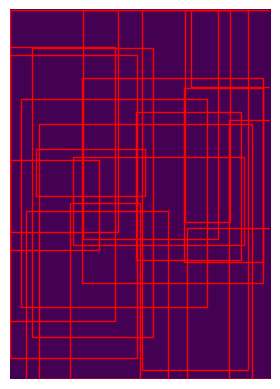

In [26]:
def plot_bounding_boxes(bounding_boxes):
    fig, ax = plt.subplots(1)
    ax.imshow(torch.zeros((500, 352)))  # Crear un lienzo vacío para dibujar las bounding boxes

    # Iterar sobre las bounding boxes y dibujarlas en el lienzo
    for bbox in bounding_boxes[0]:
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Llama a la función para dibujar las bounding boxes
plot_bounding_boxes(x_boxes)

In [ ]:
from torchvision.utils import draw_bounding_boxes
image_w_bbox = draw_bounding_boxes(image_tensor_uint8, x_boxes[0])
plt.imshow(image_w_bbox.permute(1,2,0))
plt.show()

In [ ]:
w = 353
h = 500

In [ ]:
images_whwh=[]
images_whwh.append(torch.tensor([w, h, w, h], dtype=torch.float32))
images_whwh=torch.stack(images_whwh)

In [ ]:
x_boxes = diff_boxes * images_whwh[:, None, :]

In [ ]:
x_boxes

In [ ]:
x_boxes_adjusted = x_boxes

In [ ]:
x_boxes_adjusted[:,:,0]= x_boxes[:,:,0].clamp(min=0, max=w-1)
x_boxes_adjusted[:,:,1]=x_boxes[:,:,1].clamp(min=0, max=h-1)
x_boxes_adjusted[:,:,2]=x_boxes[:,:,2].clamp(min=0, max=w-1)
x_boxes_adjusted[:,:,3]=x_boxes[:,:,3].clamp(min=0, max=h-1)

In [ ]:
x_boxes_adjusted

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

In [ ]:
image_path = "datasets/t1/images/test/000001.jpg"
image = Image.open(image_path)

# Define transformations to convert the image to a tensor
preprocess = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
])

# Apply the transformations to the image
image_tensor = preprocess(image)

In [ ]:
image_tensor_uint8 = (image_tensor*255).to(torch.uint8)

In [ ]:
x_boxes[:,:,0]= x_boxes[:,:,0].clamp(min=-w, max=w)
x_boxes[:,:,1]=x_boxes[:,:,1].clamp(min=-h, max=h)
x_boxes[:,:,2]=x_boxes[:,:,2].clamp(min=-w, max=w)
x_boxes[:,:,3]=x_boxes[:,:,3].clamp(min=-h, max=h)

In [ ]:
x_boxes = x_boxes/2

In [ ]:
x_boxes

In [ ]:
xmin,ymin,xmax,ymax = x_boxes.unbind(-1)

In [ ]:
adjusted = [(xmin + w/2), (ymin + h/2), (xmax + w/2), (ymax + h/2)]

In [ ]:
adjusted

In [ ]:
adjusted = torch.stack(adjusted, dim=-1)

In [ ]:
adjusted

In [ ]:
import torchvision

In [ ]:
x_boxes

In [1]:
image_w_bbox = torchvision.utils.draw_bounding_boxes(image_tensor_uint8, x_boxes)

NameError: name 'torchvision' is not defined

In [ ]:
new_out_pred = []
out_pred[0]['instances'].pred_boxes

In [ ]:
import torch

In [ ]:
import logging
import numpy as np
import os
import sys
import tempfile
import xml.etree.ElementTree as ET
from typing import List, Dict
from logging import Logger
from collections import OrderedDict, defaultdict
from functools import lru_cache
from pathlib import Path
 
import os
import matplotlib.pyplot as plt
import torch
from torch.distributions.weibull import Weibull
from torch.distributions.transforms import AffineTransform
from torch.distributions.transformed_distribution import TransformedDistribution
from detectron2.data.datasets.coco import load_coco_json
# from fvcore.common.file_io import PathManager
 
from detectron2.data import MetadataCatalog
# from detectron2.utils import comm
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.config import CfgNode as CN
from detectron2.data.datasets.coco import load_coco_json
import cv2
import randbox
# from detectron2.evaluation.evaluator import DatasetEvaluator
import json
np.set_printoptions(threshold=sys.maxsize)
 
all_targets_wof = load_coco_json('tao/annotations-1.0/train.json', 'tao/frames')#wof es sin filtrar
# f = open('./datasets/t1/annotations/test.json', 'r')
# ground_truth = json.load(f)
# f.close()
 
# mapping ={}
# for each in ground_truth['images']:
#     mapping[each['id']]=each['file_name'].split('.')[0]
#ESTO LO QUITO PORQUE YO NO CARGO LAS ANOTACIONES??, CON LOAD_COCO_JSON ME CARGAN LAS ANOTACIONES, PERO TENGO QUE CAMBIAR ID Y, FORMATO BBOXES??

gpu_number = str(1)
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_number
device = 'cuda:1'


cfg = get_cfg()
cfg.MODEL.RandBox = CN()
cfg.MODEL.RandBox.NUM_CLASSES = 81
cfg.MODEL.RandBox.NUM_PROPOSALS = 300

# RCNN Head.
cfg.MODEL.RandBox.NHEADS = 8
cfg.MODEL.RandBox.DROPOUT = 0.0
cfg.MODEL.RandBox.DIM_FEEDFORWARD = 2048
cfg.MODEL.RandBox.ACTIVATION = 'relu'
cfg.MODEL.RandBox.HIDDEN_DIM = 256
cfg.MODEL.RandBox.NUM_CLS = 1
cfg.MODEL.RandBox.NUM_REG = 3
cfg.MODEL.RandBox.NUM_HEADS = 6

# Dynamic Conv.
cfg.MODEL.RandBox.NUM_DYNAMIC = 2
cfg.MODEL.RandBox.DIM_DYNAMIC = 64

# Loss.
cfg.MODEL.RandBox.CLASS_WEIGHT = 2.0
cfg.MODEL.RandBox.NC_WEIGHT = 0.1
cfg.MODEL.RandBox.GIOU_WEIGHT = 2.0
cfg.MODEL.RandBox.L1_WEIGHT = 5.0
cfg.MODEL.RandBox.DEEP_SUPERVISION = True
cfg.MODEL.RandBox.NO_OBJECT_WEIGHT = 0.1

# Focal Loss.
cfg.MODEL.RandBox.USE_FOCAL = True
cfg.MODEL.RandBox.USE_FED_LOSS = False
cfg.MODEL.RandBox.ALPHA = 0.25
cfg.MODEL.RandBox.GAMMA = 2.0
cfg.MODEL.RandBox.PRIOR_PROB = 0.01

# Dynamic K
cfg.MODEL.RandBox.OTA_K = 5
cfg.MODEL.RandBox.FORWARD_K = 10


# WARM_UP
cfg.MODEL.RandBox.SIMILAR_THRESHOLD = 2.0
# cfg.MODEL.RandBox.CHANGE_START = 500
cfg.MODEL.RandBox.CHANGE_START = 0



# RandBox
cfg.MODEL.RandBox.SNR_SCALE = 2.0
cfg.MODEL.RandBox.SAMPLE_STEP = 1

# Inference
cfg.MODEL.RandBox.USE_NMS = True
cfg.MODEL.RandBox.M_STEP = 20
cfg.MODEL.RandBox.SAMPLING_METHOD = 'Random'


# Swin Backbones
cfg.MODEL.SWIN = CN()
cfg.MODEL.SWIN.SIZE = 'B'  # 'T', 'S', 'B'
cfg.MODEL.SWIN.USE_CHECKPOINT = False
cfg.MODEL.SWIN.OUT_FEATURES = (0, 1, 2, 3)  # modify

# Optimizer.
cfg.SOLVER.OPTIMIZER = "ADAMW"
cfg.SOLVER.BACKBONE_MULTIPLIER = 1.0

    
# OW EVALUATION
cfg.TEST.PREV_INTRODUCED_CLS = 0
cfg.TEST.CUR_INTRODUCED_CLS = 20


# TTA.
cfg.TEST.AUG.MIN_SIZES = (400, 500, 600, 640, 700, 900, 1000, 1100, 1200, 1300, 1400, 1800, 800)
cfg.TEST.AUG.CVPODS_TTA = True
cfg.TEST.AUG.SCALE_FILTER = True
cfg.TEST.AUG.SCALE_RANGES = ([96, 10000], [96, 10000], 
                                [64, 10000], [64, 10000],
                                [64, 10000], [0, 10000],
                                [0, 10000], [0, 256],
                                [0, 256], [0, 192],
                                [0, 192], [0, 96],
                                [0, 10000])

cfg.merge_from_file("configs/t1.yaml")
cfg.MODEL.WEIGHTS = "output/model_0019999_paper.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)
#FILTRO LAS ANOTACIONES PARA ELIMINAR LOS DATASET QUE NO TENGO

all_targets = []

for annotation in all_targets_wof:
    file_name = annotation['file_name']
    if not (file_name.startswith('tao/frames/train/HACS') or file_name.startswith('tao/frames/train/AVA')):
        all_targets.append(annotation)

for annotation in all_targets: #CAMBIO DE JPEG A JPG, JPEG NO EXISTE
    file_name = annotation['file_name']
    if file_name.endswith('.jpeg'):
        annotation['file_name'] = annotation['file_name'].replace('jpeg', 'jpg')

TAO_TO_COCO_MAPPING = {91: 13, 58: 34, 621: 33, 747: 49, 118: 8, 221: 51, 95: 1, 126: 73, 1122: 79, 729: 27, 926: 48, 1117: 61, 1038: 11, 1215: 40, 276: 74, 78: 21, 1162: 75, 699: 68, 185: 55, 13: 47, 79: 59, 982: 30, 371: 60, 896: 65, 99: 14, 642: 63, 1135: 6, 717: 64, 829: 53, 1115: 70, 235: 67, 805: 0, 41: 32, 452: 10, 1155: 25, 1144: 7, 625: 43, 60: 35, 502: 23, 4: 4, 779: 12, 1001: 57, 1099: 38, 34: 24, 45: 46, 139: 45, 980: 36, 133: 39, 382: 16, 480: 29, 154: 50, 429: 20, 211: 2, 392: 54, 36: 28, 347: 41, 544: 78, 1057: 37, 1132: 9, 1097: 62, 1018: 44, 579: 17, 714: 3, 1229: 22, 229: 15, 1091: 77, 35: 26, 979: 71, 299: 66, 174: 5, 475: 42, 237: 56, 428: 72, 937: 76, 961: 18, 852: 58, 993: 31, 81: 19}
COCO_TO_OWOD_MAPPING = {0: 14, 1: 1, 2: 6, 3: 13, 4: 0, 5: 5, 6: 18, 7: 20, 8: 3, 9: 21, 10: 22, 11: 23, 12: 24, 13: 25, 14: 2, 15: 7, 16: 11, 17: 12, 18: 16, 19: 9, 20: 26, 21: 27, 22: 28, 23: 29, 24: 30, 25: 31, 26: 32, 27: 33, 28: 34, 29: 40, 30: 41, 31: 42, 32: 43, 33: 44, 34: 45, 35: 46, 36: 47, 37: 48, 38: 49, 39: 4, 40: 74, 41: 75, 42: 76, 43: 77, 44: 78, 45: 79, 46: 50, 47: 51, 48: 52, 49: 53, 50: 54, 51: 55, 52: 56, 53: 57, 54: 58, 55: 59, 56: 8, 57: 17, 58: 15, 59: 60, 60: 10, 61: 61, 62: 19, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 35, 69: 36, 70: 37, 71: 38, 72: 39, 73: 67, 74: 68, 75: 69, 76: 70, 77: 71, 78: 72, 79: 73}

for key in COCO_TO_OWOD_MAPPING:
    if COCO_TO_OWOD_MAPPING[key]>19:
        COCO_TO_OWOD_MAPPING[key]=80

for img in all_targets:
        for ann in img['annotations']:
            category_id = ann['category_id']
            if category_id in TAO_TO_COCO_MAPPING:
                ann['category_id'] = TAO_TO_COCO_MAPPING[category_id]
    
for img in all_targets:
    for ann in img['annotations']:
        category_id = ann['category_id']
        if category_id in COCO_TO_OWOD_MAPPING:
            ann['category_id'] = COCO_TO_OWOD_MAPPING[category_id] #ANOTACIONES EN FORMATO PAPER
        else:
            ann['category_id'] = 80 #algunos no están en el mapping, así bien?         

#CAMBIO EL FORMATO DE LAS BBOXES
def xywh_to_xminyminxmaxymax(x,y,w,h,):
    xmin = x
    ymin = y
    xmax = x + w
    ymax = y + h
    return xmin, ymin, xmax, ymax

for img in all_targets:
    for ann in img['annotations']:
        x,y,w,h = ann['bbox']
        ann['bbox'] = xywh_to_xminyminxmaxymax(x,y,w,h)   

In [ ]:
all_predictions = []
for d in all_targets:
    im = cv2.imread(d['file_name'])
    outputs = predictor(im)
    all_predictions.append(outputs) #TODAS LAS PREDICCIONES EN FORMATO PAPER

torch.save(all_predictions,'all_predictions_100.pth')

In [4]:
import logging
import numpy as np
import os
import sys
import tempfile
import xml.etree.ElementTree as ET
from typing import List, Dict
from logging import Logger
from collections import OrderedDict, defaultdict
from functools import lru_cache
from pathlib import Path
 
import os
import matplotlib.pyplot as plt
import torch
from torch.distributions.weibull import Weibull
from torch.distributions.transforms import AffineTransform
from torch.distributions.transformed_distribution import TransformedDistribution
from detectron2.data.datasets.coco import load_coco_json
# from fvcore.common.file_io import PathManager
 
from detectron2.data import MetadataCatalog
# from detectron2.utils import comm
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.config import CfgNode as CN
from detectron2.data.datasets.coco import load_coco_json
import cv2
import randbox
# from detectron2.evaluation.evaluator import DatasetEvaluator
import json
np.set_printoptions(threshold=sys.maxsize)
 
all_targets = load_coco_json('datasets/t1/annotations/test.json', 'datasets/t1/images/test')#wof es sin filtrar
# f = open('./datasets/t1/annotations/test.json', 'r')
# ground_truth = json.load(f)
# f.close()
 
# mapping ={}
# for each in ground_truth['images']:
#     mapping[each['id']]=each['file_name'].split('.')[0]
#ESTO LO QUITO PORQUE YO NO CARGO LAS ANOTACIONES??, CON LOAD_COCO_JSON ME CARGAN LAS ANOTACIONES, PERO TENGO QUE CAMBIAR ID Y, FORMATO BBOXES??

gpu_number = str(0)
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_number
device = 'cuda:0'

cfg = get_cfg()
cfg.MODEL.RandBox = CN()
cfg.MODEL.RandBox.NUM_CLASSES = 81
cfg.MODEL.RandBox.NUM_PROPOSALS = 300

# RCNN Head.
cfg.MODEL.RandBox.NHEADS = 8
cfg.MODEL.RandBox.DROPOUT = 0.0
cfg.MODEL.RandBox.DIM_FEEDFORWARD = 2048
cfg.MODEL.RandBox.ACTIVATION = 'relu'
cfg.MODEL.RandBox.HIDDEN_DIM = 256
cfg.MODEL.RandBox.NUM_CLS = 1
cfg.MODEL.RandBox.NUM_REG = 3
cfg.MODEL.RandBox.NUM_HEADS = 6

# Dynamic Conv.
cfg.MODEL.RandBox.NUM_DYNAMIC = 2
cfg.MODEL.RandBox.DIM_DYNAMIC = 64

# Loss.
cfg.MODEL.RandBox.CLASS_WEIGHT = 2.0
cfg.MODEL.RandBox.NC_WEIGHT = 0.1
cfg.MODEL.RandBox.GIOU_WEIGHT = 2.0
cfg.MODEL.RandBox.L1_WEIGHT = 5.0
cfg.MODEL.RandBox.DEEP_SUPERVISION = True
cfg.MODEL.RandBox.NO_OBJECT_WEIGHT = 0.1

# Focal Loss.
cfg.MODEL.RandBox.USE_FOCAL = True
cfg.MODEL.RandBox.USE_FED_LOSS = False
cfg.MODEL.RandBox.ALPHA = 0.25
cfg.MODEL.RandBox.GAMMA = 2.0
cfg.MODEL.RandBox.PRIOR_PROB = 0.01

# Dynamic K
cfg.MODEL.RandBox.OTA_K = 5
cfg.MODEL.RandBox.FORWARD_K = 10


# WARM_UP
cfg.MODEL.RandBox.SIMILAR_THRESHOLD = 2.0
# cfg.MODEL.RandBox.CHANGE_START = 500
cfg.MODEL.RandBox.CHANGE_START = 0



# RandBox
cfg.MODEL.RandBox.SNR_SCALE = 2.0
cfg.MODEL.RandBox.SAMPLE_STEP = 1

# Inference
cfg.MODEL.RandBox.USE_NMS = True
cfg.MODEL.RandBox.M_STEP = 20
cfg.MODEL.RandBox.SAMPLING_METHOD = 'Random'


# Swin Backbones
cfg.MODEL.SWIN = CN()
cfg.MODEL.SWIN.SIZE = 'B'  # 'T', 'S', 'B'
cfg.MODEL.SWIN.USE_CHECKPOINT = False
cfg.MODEL.SWIN.OUT_FEATURES = (0, 1, 2, 3)  # modify

# Optimizer.
cfg.SOLVER.OPTIMIZER = "ADAMW"
cfg.SOLVER.BACKBONE_MULTIPLIER = 1.0

    
# OW EVALUATION
cfg.TEST.PREV_INTRODUCED_CLS = 0
cfg.TEST.CUR_INTRODUCED_CLS = 20


# TTA.
cfg.TEST.AUG.MIN_SIZES = (400, 500, 600, 640, 700, 900, 1000, 1100, 1200, 1300, 1400, 1800, 800)
cfg.TEST.AUG.CVPODS_TTA = True
cfg.TEST.AUG.SCALE_FILTER = True
cfg.TEST.AUG.SCALE_RANGES = ([96, 10000], [96, 10000], 
                                [64, 10000], [64, 10000],
                                [64, 10000], [0, 10000],
                                [0, 10000], [0, 256],
                                [0, 256], [0, 192],
                                [0, 192], [0, 96],
                                [0, 10000])

cfg.merge_from_file("configs/t1.yaml")
cfg.MODEL.WEIGHTS = "output/model_0019999_paper.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

/home/tri110985/nfs_home/RandomBoxesObjectDetector/venv-od/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch

In [6]:
config = torch.load("configuracion_paper.pkl")

In [7]:
from detectron2.checkpoint import DetectionCheckpointer
from train_net import Trainer

In [8]:
model = Trainer.build_model(config)

In [9]:
DetectionCheckpointer(model, save_dir=config.OUTPUT_DIR).resume_or_load(config.MODEL.WEIGHTS, resume=False)

{'trainer': {'iteration': 19999,
  'hooks': {'LRScheduler': {'base_lrs': [2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.5e-05,
     2.

In [ ]:
data_loader=torch.load('dataloader.pkl')

In [ ]:
for idx, inputs in enumerate(data_loader):
    print(inputs)
    if idx == 0:
        break

In [10]:
from detectron2.engine.my_defaults import DefaultTrainer
from my_train_net import Register

In [ ]:
data_Register=Register('tao/')
targets = data_Register.register_dataset()

In [11]:
from detectron2.data import DatasetCatalog, MetadataCatalog

In [12]:
targets_LaSOT = torch.load('targets_with_images_LaSOT.pkl')
DatasetCatalog.register('val_lsot', lambda: targets_LaSOT)

data_loader = DefaultTrainer.build_test_loader(config,dataset_name='my_val')

In [2]:
import os
from detectron2.data import DatasetCatalog, MetadataCatalog

In [13]:
data_loader_lsot = DefaultTrainer.build_test_loader(config,dataset_name='val_lsot')

In [18]:
for idx, inputs in enumerate(data_loader_lsot):
    input = inputs
    if idx == 0:
        break

In [19]:
input

[{'file_name': 'tao/frames/train/LaSOT/airplane-4/00001981.jpg',
  'height': 720,
  'width': 1280,
  'image_id': 0,
  'image': tensor([[[  7,  27,  44,  ...,  38,  21,   4],
           [ 29,  50,  67,  ...,  64,  47,  30],
           [ 42,  62,  80,  ...,  77,  59,  43],
           ...,
           [ 36,  53,  74,  ...,  71,  50,  34],
           [ 26,  42,  63,  ...,  61,  40,  24],
           [  0,  14,  33,  ...,  43,  22,   6]],
  
          [[ 33,  53,  70,  ...,  63,  46,  29],
           [ 55,  76,  93,  ...,  89,  72,  55],
           [ 68,  88, 106,  ..., 102,  84,  68],
           ...,
           [ 61,  78,  99,  ...,  98,  77,  61],
           [ 51,  67,  88,  ...,  88,  67,  51],
           [ 23,  39,  58,  ...,  70,  49,  33]],
  
          [[ 56,  76,  95,  ...,  94,  77,  60],
           [ 78,  99, 118,  ..., 120, 103,  86],
           [ 91, 111, 131,  ..., 133, 115,  99],
           ...,
           [ 91, 108, 129,  ..., 125, 104,  88],
           [ 81,  97, 118,  ..., 11

In [ ]:
input[0]

In [ ]:
outputs = []

In [ ]:
# for idx, inputs in enumerate(data_loader):
#     output = model(inputs)
#     outputs.append(output)
# torch.save(outputs, 'all_predictions_500_paper_dataloader.pth')
outputs = torch.load('all_predictions_500.pth')

In [ ]:
outputs2 = torch.load('all_predictions_500_paper.pth')

In [ ]:
outputs2[0]

In [ ]:
output_1d = [item for sublist in outputs for item in sublist]

In [ ]:
output_1d[0]['instances']

In [ ]:
config.MODEL_WEIGHTS


In [ ]:
predictorCGF = DefaultPredictor(config)

In [ ]:
data_loader = torch.load('dataloader.pkl')

In [ ]:
for idx, inputs in enumerate(data_loader):
    output = model(inputs)
    if idx == 0:
        break

In [ ]:
Instances(num_instances=4, image_height=500, image_width=353, fields=[pred_boxes: Boxes(tensor([[  2.6551,  13.1225, 352.2233, 498.0433],
        [ 51.3452, 242.6308, 188.3894, 382.4202],
        [  0.6985,  13.4859, 351.5818, 498.6660],
        [334.8226, 148.6321, 351.9658, 500.0000]], device='cuda:0')), scores: tensor([0.5749, 0.2807, 0.2146, 0.1903], device='cuda:0'), pred_classes: tensor([14, 11, 80, 80], device='cuda:0')])

In [ ]:
import torch

In [ ]:
cfg = torch.load('configuracion_paper.pkl')

In [ ]:
cfg.DATASETS.TEST

In [ ]:
from detectron2.engine.my_defaults import DefaultTrainer

In [ ]:
VAL_PATH = 'tao/frames'
VAL_JSON = 'tao/annotations-1.0/train.json'

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets.coco import load_coco_json

In [ ]:
DatasetCatalog.register("my_val_TAO", lambda: load_coco_json(VAL_JSON, VAL_PATH))

In [ ]:
dataset_name = "my_val_TAO"

In [ ]:
data_loader = DefaultTrainer.build_test_loader(cfg, dataset_name)

In [ ]:
len(data_loader)

In [ ]:
for i,input in enumerate(data_loader,0):
    file_name = input[0]['file_name']
    if (file_name.startswith('tao/frames/train/HACS') or file_name.startswith('tao/frames/train/AVA')):
        continue

In [ ]:
import json

In [ ]:
f = open('tao/annotations-1.0/train.json', 'r')
ground_truth = json.load(f)
f.close()

mapping ={}
for each in ground_truth['images']:
    mapping[each['id']]=each['file_name'].split('.')[0]  

In [ ]:
mapping

In [ ]:
keys_to_delete = [k for k, v in mapping.items() if v.startswith('train/HACS') or v.startswith('train/AVA')]

In [ ]:
keys_to_delete

In [ ]:
for key in keys_to_delete:
    del mapping[key]

In [ ]:
len(mapping)

In [ ]:
mapping

In [8]:
from detectron2.data.datasets.coco import load_coco_json
import os

In [9]:
DATASET_ROOT = 'tao/'
ANN_ROOT=DATASET_ROOT

In [10]:
VAL_PATH = os.path.join(DATASET_ROOT, 'frames')#por qué con /train no me filtra?
VAL_JSON = os.path.join(ANN_ROOT, 'annotations-1.0/train.json')

In [11]:
targets_wof = load_coco_json(VAL_JSON, VAL_PATH, )

In [12]:
len(targets_wof)

18274

In [13]:
targets_wof[0]

{'file_name': 'tao/frames/train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0391.jpg',
 'height': 480,
 'width': 640,
 'image_id': 0,
 'annotations': [{'iscrowd': 0,
   'bbox': [114, 166, 67, 71],
   'category_id': 95,
   'segmentation': [[114, 166, 181, 166, 181, 237, 114, 237]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [156, 97, 150, 301],
   'category_id': 805,
   'segmentation': [[156, 97, 306, 97, 306, 398, 156, 398]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [128, 123, 59, 89],
   'category_id': 805,
   'segmentation': [[128, 123, 187, 123, 187, 212, 128, 212]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [162, 240, 134, 240],
   'category_id': 95,
   'segmentation': [[162, 240, 296, 240, 296, 480, 162, 480]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [0, 228, 82, 39],
   'category_id': 805,
   'segmentation': [[0, 228, 82, 228, 82, 267, 0, 267]],
   'bbox_mode': <BoxMode.

In [ ]:
targets = []
for annotation in targets_wof:
    file_name = annotation['file_name']
    if not (file_name.startswith('tao/frames/train/HACS') or file_name.startswith('tao/frames/train/AVA')):
        targets.append(annotation)
for annotation in targets: #CAMBIO DE JPEG A JPG, JPEG NO EXISTE
    file_name = annotation['file_name']
    if file_name.endswith('.jpeg'):
        annotation['file_name'] = annotation['file_name'].replace('jpeg', 'jpg')

TAO_TO_COCO_MAPPING = {91: 13, 58: 34, 621: 33, 747: 49, 118: 8, 221: 51, 95: 1, 126: 73, 1122: 79, 729: 27, 926: 48, 1117: 61, 1038: 11, 1215: 40, 276: 74, 78: 21, 1162: 75, 699: 68, 185: 55, 13: 47, 79: 59, 982: 30, 371: 60, 896: 65, 99: 14, 642: 63, 1135: 6, 717: 64, 829: 53, 1115: 70, 235: 67, 805: 0, 41: 32, 452: 10, 1155: 25, 1144: 7, 625: 43, 60: 35, 502: 23, 4: 4, 779: 12, 1001: 57, 1099: 38, 34: 24, 45: 46, 139: 45, 980: 36, 133: 39, 382: 16, 480: 29, 154: 50, 429: 20, 211: 2, 392: 54, 36: 28, 347: 41, 544: 78, 1057: 37, 1132: 9, 1097: 62, 1018: 44, 579: 17, 714: 3, 1229: 22, 229: 15, 1091: 77, 35: 26, 979: 71, 299: 66, 174: 5, 475: 42, 237: 56, 428: 72, 937: 76, 961: 18, 852: 58, 993: 31, 81: 19}
COCO_TO_OWOD_MAPPING = {0: 14, 1: 1, 2: 6, 3: 13, 4: 0, 5: 5, 6: 18, 7: 20, 8: 3, 9: 21, 10: 22, 11: 23, 12: 24, 13: 25, 14: 2, 15: 7, 16: 11, 17: 12, 18: 16, 19: 9, 20: 26, 21: 27, 22: 28, 23: 29, 24: 30, 25: 31, 26: 32, 27: 33, 28: 34, 29: 40, 30: 41, 31: 42, 32: 43, 33: 44, 34: 45, 35: 46, 36: 47, 37: 48, 38: 49, 39: 4, 40: 74, 41: 75, 42: 76, 43: 77, 44: 78, 45: 79, 46: 50, 47: 51, 48: 52, 49: 53, 50: 54, 51: 55, 52: 56, 53: 57, 54: 58, 55: 59, 56: 8, 57: 17, 58: 15, 59: 60, 60: 10, 61: 61, 62: 19, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 35, 69: 36, 70: 37, 71: 38, 72: 39, 73: 67, 74: 68, 75: 69, 76: 70, 77: 71, 78: 72, 79: 73}

for key in COCO_TO_OWOD_MAPPING:
    if COCO_TO_OWOD_MAPPING[key]>19:
        COCO_TO_OWOD_MAPPING[key]=80

for img in targets:
        for ann in img['annotations']:
            category_id = ann['category_id']
            if category_id in TAO_TO_COCO_MAPPING:
                ann['category_id'] = TAO_TO_COCO_MAPPING[category_id]
    
for img in targets:
    for ann in img['annotations']:
        category_id = ann['category_id']
        if category_id in COCO_TO_OWOD_MAPPING:
            ann['category_id'] = COCO_TO_OWOD_MAPPING[category_id] #ANOTACIONES EN FORMATO PAPER
        else:
            ann['category_id'] = 80 #algunos no están en el mapping

In [ ]:
len(targets)

In [ ]:
targets[0]

In [ ]:
import torch

In [ ]:
model = torch.load('')

In [2]:
abs_dir = 'tao/frames/train'

In [3]:
import os

In [8]:
total_image_files = []
for directory in sorted(os.listdir(abs_dir)):
    if not (directory=='ArgoVerse' or directory=='Charades' or directory=='LaSOT'):
        for dir in sorted(os.listdir(abs_dir + '/' + directory)):
            image_root = abs_dir + '/' + directory + '/' + dir
            image_files = sorted([os.path.join(image_root, f) for f in os.listdir(image_root) if f.endswith('.jpg') or f.endswith('.jpeg')])
            total_image_files.append(image_files)

In [9]:
length = 0
for i,files in enumerate(total_image_files):
    length += len(files)

In [10]:
length

142160